# Distillation Lab Calculations
### By Landon Dame, Gabriel Powell, Marcus Schwarting, and Rebekah Taylor
Part of the Distillation Lab for CHE 486 (3/7/2018)

In [1]:
# Plotting Libraries #
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

# Systems/Analysis Libraries #
import sys
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

## Raw Data, Part 1: Stream and Tray Data

In [2]:
# TIME INVERVALS (every 10 minutes) #

time = range(0,45,10)

feed_MeOH_rotameter_reading = [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
reflux_MeOH_rotameter_reading = [5.15, 5.1, 5.2, 5.3, 5.0, 5.0, 5.0]
overhead_MeOH_rotameter_reading = [8.0, 8.0, 7.8, 8.0, 7.6, 7.6, 7.6]

# STREAM TEMPERATURES (Fahrenheit) (every 10 minutes) #

feed_MeOH_temperature = [82.0, 82.0, 82.0, 82.0, 82.0]
reflux_MeOH_temperature = [76.0, 76.0, 76.0, 75.0, 76.0]
bottoms_MeOH_temperature = [92.0, 92.0, 92.0, 91.0, 91.0]
overhead_MeOH_temperature = [68.0, 67.0, 67.0, 67.0, 67.0]

# TRAY TEMPERATURE (Celsius) (every 10 minutes) #

bottoms_drum_temp = [94.2, 94.3, 95.2, 95.9, 96.2]
tops_drum_temp = [75.5, 75.5, 75.5, 75.2, 74.8]


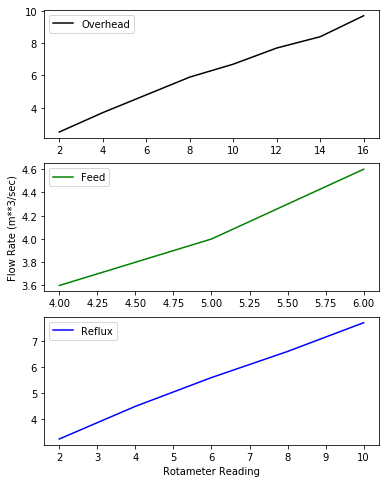

In [3]:
# ROTAMETER READINGS
plot_rotameter_reading_overhead = range(2,17,2)
plot_rotameter_overhead_flow_rate = [2.5, 3.7, 4.8, 5.9, 6.7, 7.7, 8.4, 9.7] #m**3/sec
plt.figure(figsize=(6,8))
plt.subplot(311)
plt.plot(plot_rotameter_reading_overhead,plot_rotameter_overhead_flow_rate,c='black',label='Overhead')
plt.legend()

plot_rotameter_reading_feed = [4,5,6] #m**3/sec
plot_rotameter_feed_flow_rate = [3.6, 4, 4.6]
plt.subplot(312)
plt.plot(plot_rotameter_reading_feed,plot_rotameter_feed_flow_rate, c='green', label='Feed')
plt.ylabel('Flow Rate (m**3/sec)')
plt.legend()

plot_rotameter_reading_reflux = range(2,11,2) #m**3/sec
plot_rotameter_reflux_flow_rate = [3.25, 4.5, 5.6, 6.6, 7.7]
plt.subplot(313)
plt.plot(plot_rotameter_reading_reflux,plot_rotameter_reflux_flow_rate, c='blue', label='Reflux')
plt.xlabel('Rotameter Reading')
plt.legend()
plt.show()


rotameter_exp_overhead = [14.5, 12.5, 11.8, 12.4, 12]
average_overhead = np.average([np.interp(i,plot_rotameter_reading_overhead,\
                                         plot_rotameter_overhead_flow_rate) for i in rotameter_exp_overhead])

rotameter_exp_feed = [5]*5
average_feed = np.interp(rotameter_exp_feed[0],plot_rotameter_reading_feed,plot_rotameter_feed_flow_rate)


rotameter_exp_reflux = [5.15, 5.1, 5.2, 5.3, 5.0]
average_reflux = np.average([np.interp(i,plot_rotameter_reading_reflux,\
                                         plot_rotameter_reflux_flow_rate) for i in rotameter_exp_reflux])

## Raw Data, Part 2: Refractive Index Data and Processing

In [4]:
# Tank Samples Refractive Indexes #

feed_analog_ri = 1.3374
feed_digital_ri = 1.3376
feed_avg = (feed_analog_ri+feed_digital_ri)/2

tops_analog_ri = 1.3357
tops_digital_ri = 1.3368
tops_avg = (tops_analog_ri+tops_digital_ri)/2

bottoms_analog_ri = 1.3337
bottoms_digital_ri = 1.3339
bottoms_avg = (bottoms_analog_ri+bottoms_digital_ri)/2

# Data is listed from tray 1 to tray 6 #
tray_data_run1_liq_analog_ri = [1.3396, 1.3410, 1.3419, 1.3376, 1.3364, 1.3345]
tray_data_run1_vap_analog_ri = [1.3400, 1.3409, 1.3416, 1.3399, 1.3376, 1.3350]

tray_data_run1_liq_digital_ri = [1.3402, 1.3421, 1.3424, 1.3381, 1.3362, 1.3349]
tray_data_run1_vap_digital_ri = [1.3387, 1.3413, 1.3418, 1.3407, 1.3470, 1.3356]


tray_data_run2_liq_analog_ri = [1.3394, 1.3419, 1.3419, 1.3376, 1.3365, 1.3350]
tray_data_run2_vap_analog_ri = [1.3403, 1.3411, 1.3421, 1.3401, 1.3378, 1.3360]

tray_data_run2_liq_digital_ri = [1.3399, 1.3418, 1.3424, 1.3381, 1.3366, 1.3352]
tray_data_run2_vap_digital_ri = [1.3400, 1.3413, 1.3426, 1.3411, 1.3377, 1.3358]

tray_data_liq_avg = [round(np.average([x,y,z,w]),6) for (x,y,z,w) in zip(tray_data_run1_liq_analog_ri,\
                                                                         tray_data_run1_liq_digital_ri,\
                                                                         tray_data_run2_liq_analog_ri,\
                                                                         tray_data_run2_liq_digital_ri)]
tray_data_vap_avg = [round(np.average([x,y,z,w]),6) for (x,y,z,w) in zip(tray_data_run1_vap_analog_ri,\
                                                                         tray_data_run1_vap_digital_ri,\
                                                                         tray_data_run2_vap_analog_ri,\
                                                                         tray_data_run2_vap_digital_ri)]

# Refractive Index Values for Methanol/Water Mixtures (from paper) #

mole_fraction_MeOH = [0.0, 0.0995, 0.1950, 0.2962, 0.3512, 0.4807,\
                      0.5890, 0.6339, 0.7429, 0.8891, 1.0]
mole_fraction_MeOH_ri = [1.3330, 1.3370, 1.3407, 1.3420, 1.3423, 1.3414,\
                         1.3400, 1.3395, 1.3372, 1.3335, 1.3297]


print(tray_data_liq_avg)
print(tray_data_vap_avg)

[1.339775, 1.3417, 1.34215, 1.33785, 1.336425, 1.3349]
[1.33975, 1.34115, 1.342025, 1.34045, 1.340025, 1.3356]


## Plotting and Splining of the Refractive Index Values of a Methanol-Water Mixture

Feed MeOH Concentration: 
0.103527324922
Tops MeOH Concentration: 
0.783525471915
Bottoms MeOH Concentration: 
0.0181605968567


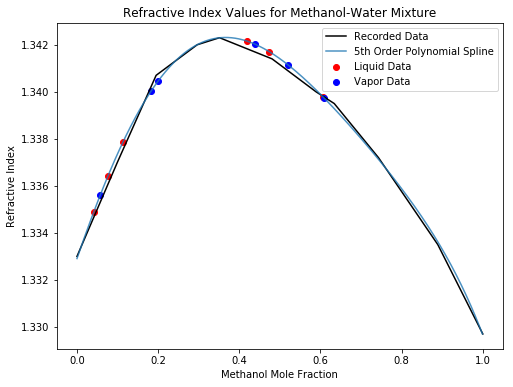

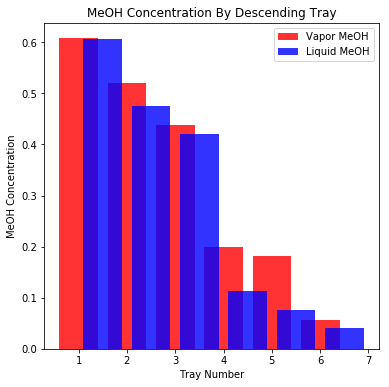

,,Tray 1,Tray 2,Tray 3,Tray 4,Tray 5,Tray 6
0,Liq MeOH,0.606686,0.474355,0.419866,0.112950,0.076437,0.041539
1,Vap MeOH,0.608104,0.519658,0.438577,0.199636,0.182428,0.057136


In [5]:
coeff = np.polyfit(mole_fraction_MeOH, mole_fraction_MeOH_ri,deg=5).tolist()
p = np.poly1d(coeff)
x = np.arange(0,1,0.001)
y = p(x)
plt.figure(figsize=(8,6))
plt.plot(mole_fraction_MeOH,mole_fraction_MeOH_ri,c='black',label='Recorded Data')
plt.plot(x,y,alpha=0.8,label='5th Order Polynomial Spline')

print('Feed MeOH Concentration: ')
feed_MeOH = sorted([t for t in np.real([i for i in np.roots(coeff[:5]+\
                   [coeff[-1]-feed_avg]) if np.imag(i)==0]) if t>0])[0]
print(feed_MeOH)

print('Tops MeOH Concentration: ')
tops_MeOH = sorted([t for t in np.real([i for i in np.roots(coeff[:5]+\
                   [coeff[-1]-tops_avg]) if np.imag(i)==0]) if t>0])[1]
print(tops_MeOH)

print('Bottoms MeOH Concentration: ')
bottoms_MeOH = [t for t in np.real([i for i in np.roots(coeff[:5]+\
                [coeff[-1]-bottoms_avg]) if np.imag(i)==0]) if t>0][1]
print(bottoms_MeOH)

tray_data_liq_MeOH = []
for g in range(0,len(tray_data_liq_avg)):
    if g < len(tray_data_liq_avg)/2:
        find_zeros = sorted([t for t in np.real([i for i in np.roots(coeff[:5]+\
                     [coeff[-1]-tray_data_liq_avg[g]]) if np.imag(i)==0]) if t>0])[1]
    else:
        find_zeros = sorted([t for t in np.real([i for i in np.roots(coeff[:5]+\
                     [coeff[-1]-tray_data_liq_avg[g]]) if np.imag(i)==0]) if t>0])[0]
    tray_data_liq_MeOH.append(find_zeros)

tray_data_vap_MeOH = []
for g in range(0,len(tray_data_vap_avg)):
    if g < len(tray_data_vap_avg)/2:
        find_zeros = sorted([t for t in np.real([i for i in np.roots(coeff[:5]+\
                     [coeff[-1]-tray_data_vap_avg[g]]) if np.imag(i)==0]) if t>0])[1]
    else:
        find_zeros = min(sorted([abs(t) for t in np.real([i for i in np.roots(coeff[:5]+\
                     [coeff[-1]-tray_data_vap_avg[g]]) if np.imag(i)==0])]))
    tray_data_vap_MeOH.append(find_zeros)

    
df = pd.DataFrame([['Liq MeOH']+tray_data_liq_MeOH,['Vap MeOH']+tray_data_vap_MeOH])
#df=df.transpose()
df.columns = ['','Tray 1', 'Tray 2', 'Tray 3', 'Tray 4', 'Tray 5', 'Tray 6']

plt.scatter(tray_data_liq_MeOH,tray_data_liq_avg,c='red',label='Liquid Data')
plt.scatter(tray_data_vap_MeOH,tray_data_vap_avg,c='blue',label='Vapor Data')
plt.title('Refractive Index Values for Methanol-Water Mixture')
plt.xlabel('Methanol Mole Fraction'); plt.ylabel('Refractive Index')
plt.legend()
plt.show()


plt.figure(figsize=(6,6))
#plt.bar(df.columns,tray_data_liq_MeOH)
#plt.bar(df.columns,tray_data_vap_MeOH)
plt.bar([i+1 for i in range(0,len(tray_data_vap_MeOH))],\
        tray_data_vap_MeOH,color='red',alpha = 0.8, label='Vapor MeOH')
plt.bar([i+1.5 for i in range(0,len(tray_data_liq_MeOH))],\
        tray_data_liq_MeOH,color='blue',alpha=0.8,label='Liquid MeOH')
plt.legend()
plt.xlabel('Tray Number')
plt.ylabel('MeOH Concentration')
plt.title('MeOH Concentration By Descending Tray')
plt.show()

df

## Raw Data, Part 3a: Rotameter Readings and Processing (Feed Stream)

In [6]:
#Density of Methanol from http://ddbonline.ddbst.de/DIPPR105DensityCalculation/DIPPR105CalculationCGI.exe
#Density of Water from https://www.easycalculation.com/physics/classical-physics/water-density.php

#### SEE ABOVE FOR CHANGES


feed_MeOH_rotameter_average = np.average(feed_MeOH_rotameter_reading)

#Feed flow rate is in m^3/s
feed_MeOH_flow_rate = [i*10**-6 for i in [4.4, 4.3, 4.2, 4.6, 4.6, 4.6, 4.6]] #Manual Entering of Flow Rates Here!
feed_MeOH_flow_rate_average = np.average(feed_MeOH_flow_rate)

#Feed MeOH temperature in Fahrenheit
feed_MeOH_temperature_average = np.average(feed_MeOH_temperature)

#Methanol density in kg/m**3
feed_MeOH_density = [782.148, 782.671, 782.671, 782.148, 782.671, 781.148, 782.671]
feed_MeOH_density_average = np.average(feed_MeOH_density)

#Water density in kg/m**3
feed_water_density = [995.34, 995.51, 995.51, 995.34, 995.51, 995.34, 995.51]
feed_water_density_average = np.average(feed_water_density)

feed_MeOH_mass_percent = (feed_MeOH*100.0*32.04)/(feed_MeOH*32.04 + (1-feed_MeOH)*18.02)
feed_water_mass_percent = 100-feed_MeOH_mass_percent

#Density of the mixture kg/m**3
feed_mixture_density = [feed_MeOH_density[i]*feed_MeOH_mass_percent/100 + \
                        feed_water_density[i]*feed_water_mass_percent/100 \
                        for i in range(0,len(feed_MeOH_density))]
feed_mixture_density_average = np.average(feed_mixture_density)

#Feed Mass Flow Rate of the Mixture kg/s
feed_mixture_mass_flow_rate = [feed_MeOH_flow_rate[i]*feed_mixture_density[i] \
                               for i in range(0,len(feed_MeOH_flow_rate))]
feed_mixture_mass_flow_rate_average = np.average(feed_mixture_mass_flow_rate)

#Feed Molar Flow Rate of the Mixture mol/s
feed_molar_flow_rate = [(feed_mixture_mass_flow_rate[i]*10**5)/(feed_MeOH_mass_percent*32.04 +\
                    feed_water_mass_percent*18.02) for i in range(0,len(feed_mixture_mass_flow_rate))]
feed_molar_flow_rate_average = np.average(feed_molar_flow_rate)


## Raw Data, Part 3b: Rotameter Readings and Processing (Reflux Stream)

In [7]:
reflux_MeOH_rotameter_average = np.average(reflux_MeOH_rotameter_reading)

#Reflux flow rate is in m^3/s
reflux_MeOH_flow_rate = [i*10**-6 for i in [4.4, 4.3, 4.3, 4.2, 4.2, 4.2, 4.2]]
reflux_MeOH_flow_rate_average = np.average(reflux_MeOH_flow_rate)

#Reflux MeOH temperature in Fahrenheit
reflux_MeOH_temperature_average = np.average(reflux_MeOH_temperature)

#Methanol density in kg/m**3
reflux_MeOH_density = [784.758, 784.758, 787.867, 787.35, 788.382, 788.382, 788.382]
reflux_MeOH_density_average = np.average(reflux_MeOH_density)

#Water density in kg/m**3
reflux_water_density = [996.17, 996.17, 997.08, 996.93, 997.22, 997.22, 997.22]
reflux_water_density_average = np.average(reflux_water_density)

#Note: tops_MeOH == reflux_MeOH
reflux_MeOH_mass_percent = (tops_MeOH*100.0*32.04)/(tops_MeOH*32.04 + (1-tops_MeOH)*18.02)
reflux_water_mass_percent = 100-reflux_MeOH_mass_percent

#Density of the mixture kg/m**3
reflux_mixture_density = [reflux_MeOH_density[i]*reflux_MeOH_mass_percent/100 + \
                        reflux_water_density[i]*reflux_water_mass_percent/100 \
                        for i in range(0,len(reflux_MeOH_density))]
reflux_mixture_density_average = np.average(reflux_mixture_density)

#Reflux Mass Flow Rate of the Mixture kg/s
reflux_mixture_mass_flow_rate = [reflux_MeOH_flow_rate[i]*reflux_mixture_density[i] \
                               for i in range(0,len(reflux_MeOH_flow_rate))]
reflux_mixture_mass_flow_rate_average = np.average(reflux_mixture_mass_flow_rate)

#Reflux Molar Flow Rate of the Mixture mol/s
reflux_molar_flow_rate = [(reflux_mixture_mass_flow_rate[i]*10**5)/(reflux_MeOH_mass_percent*32.04 +\
                    reflux_water_mass_percent*18.02) for i in range(0,len(reflux_mixture_mass_flow_rate))]
reflux_molar_flow_rate_average = np.average(reflux_molar_flow_rate)


## Raw Data, Part 3d: Rotameter Readings and Processing (Overhead Stream)

In [8]:
overhead_MeOH_rotameter_average = np.average(overhead_MeOH_rotameter_reading)

#Ovehead flow rate is in m^3/s
overhead_MeOH_flow_rate = [i*10**-6 for i in [6.6, 6.6, 6.5, 6.4, 6.4, 6.4]]
overhead_MeOH_flow_rate_average = np.average(overhead_MeOH_flow_rate)

#Overhead MeOH temperature in Fahrenheit
overhead_MeOH_temperature_average = np.average(overhead_MeOH_temperature)

#Methanol density in kg/m**3
overhead_MeOH_density = [796.031, 796.536, 796.031, 796.536, 796.536, 796.031, 796.031]
overhead_MeOH_density_average = np.average(overhead_MeOH_density)

#Water density in kg/m**3
overhead_water_density = [998.95, 999.04, 998.95, 999.04, 999.04, 998.95, 998.95]
overhead_water_density_average = np.average(overhead_water_density)

overhead_MeOH_mass_percent = (tops_MeOH*100.0*32.04)/(tops_MeOH*32.04 + (1-tops_MeOH)*18.02)
overhead_water_mass_percent = 100-overhead_MeOH_mass_percent

#Density of the mixture kg/m**3
overhead_mixture_density = [overhead_MeOH_density[i]*overhead_MeOH_mass_percent/100 + \
                        overhead_water_density[i]*overhead_water_mass_percent/100 \
                        for i in range(0,len(overhead_MeOH_density))]
overhead_mixture_density_average = np.average(overhead_mixture_density)

#Mass Flow Rate of the Mixture kg/s
overhead_mixture_mass_flow_rate = [overhead_MeOH_flow_rate[i]*overhead_mixture_density[i] \
                               for i in range(0,len(overhead_MeOH_flow_rate))]
overhead_mixture_mass_flow_rate_average = np.average(overhead_mixture_mass_flow_rate)

overhead_molar_flow_rate = [(overhead_mixture_mass_flow_rate[i]*10**5)/(overhead_MeOH_mass_percent*32.04 +\
                    overhead_water_mass_percent*18.02) for i in range(0,len(overhead_mixture_mass_flow_rate))]
overhead_molar_flow_rate_average = np.average(overhead_molar_flow_rate)


## Raw Data, Part 3e: Rotameter Readings and Processing (Distillate Stream)

In [9]:
#No rotameter available for the distillate stream, must calculate using the other streams.

#Distillate flow rate is in m^3/s
distillate_MeOH_flow_rate = [s-t for (s,t) in zip(overhead_MeOH_flow_rate,\
                                                    reflux_MeOH_flow_rate)]
distillate_MeOH_flow_rate_average = np.average(distillate_MeOH_flow_rate)

#Distillate MeOH temperature in Fahrenheit
#distillate_MeOH_temperature_average = np.average(distillate_MeOH_temperature)

#Methanol density in kg/m**3
distillate_MeOH_density = [796.031, 796.536, 796.031, 796.536, 796.536, 796.031, 796.031]
distillate_MeOH_density_average = np.average(distillate_MeOH_density)

#Water density in kg/m**3
distillate_water_density = [998.95, 999.04, 998.95, 999.04, 999.04, 998.95, 998.95]
distillate_water_density_average = np.average(distillate_water_density)

#Note that reflux_MeOH == distillate_MeOH
distillate_MeOH_mass_percent = (tops_MeOH*100.0*32.04)/(tops_MeOH*32.04 + (1-tops_MeOH)*18.02)
distillate_water_mass_percent = 100-distillate_MeOH_mass_percent

#Density of the mixture kg/m**3
distillate_mixture_density = [distillate_MeOH_density[i]*distillate_MeOH_mass_percent/100 + \
                        distillate_water_density[i]*distillate_water_mass_percent/100 \
                        for i in range(0,len(distillate_MeOH_density))]
distillate_mixture_density_average = np.average(distillate_mixture_density)

#Mass Flow Rate of the Mixture kg/s
distillate_mixture_mass_flow_rate = [distillate_MeOH_flow_rate[i]*distillate_mixture_density[i] \
                               for i in range(0,len(distillate_MeOH_flow_rate))]
distillate_mixture_mass_flow_rate_average = np.average(distillate_mixture_mass_flow_rate)

distillate_molar_flow_rate = [(distillate_mixture_mass_flow_rate[i]*10**5)/(distillate_MeOH_mass_percent*32.04 +\
                    distillate_water_mass_percent*18.02) for i in range(0,len(distillate_mixture_mass_flow_rate))]
distillate_molar_flow_rate_average = np.average(distillate_molar_flow_rate)



## Raw Data, Part 3c: Rotameter Readings and Processing (Bottoms Stream)

In [10]:
bottoms_MeOH_flow_rate = [i-j for (i,j) in zip(feed_MeOH_flow_rate,distillate_MeOH_flow_rate)]

bottoms_MeOH_flow_rate_average = np.average(bottoms_MeOH_flow_rate)

#Bottoms MeOH temperature in Fahrenheit
bottoms_MeOH_temperature_average = np.average(bottoms_MeOH_temperature)

#Methanol density in kg/m**3
bottoms_MeOH_density = [781.098, 783.194, 780.573, 780.573, 781.624, 780.046, 781.098]
bottoms_MeOH_density_average = np.average(bottoms_MeOH_density)

#Water density in kg/m**3
bottoms_water_density = [994.99, 995.68, 994.81, 994.81, 995.16, 994.62, 994.99]
bottoms_water_density_average = np.average(bottoms_water_density)

bottoms_MeOH_mass_percent = (bottoms_MeOH*100.0*32.04)/(bottoms_MeOH*32.04 + (1-bottoms_MeOH)*18.02)
bottoms_water_mass_percent = 100-bottoms_MeOH_mass_percent

#Density of the mixture kg/m**3
bottoms_mixture_density = [bottoms_MeOH_density[i]*bottoms_MeOH_mass_percent/100 + \
                        bottoms_water_density[i]*bottoms_water_mass_percent/100 \
                        for i in range(0,len(bottoms_MeOH_density))]
bottoms_mixture_density_average = np.average(bottoms_mixture_density)

#Mass Flow Rate of the Mixture kg/s
bottoms_mixture_mass_flow_rate = [bottoms_MeOH_flow_rate[i]*bottoms_mixture_density[i] \
                               for i in range(0,len(bottoms_MeOH_flow_rate))]
bottoms_mixture_mass_flow_rate_average = np.average(bottoms_mixture_mass_flow_rate)

bottoms_molar_flow_rate = [(bottoms_mixture_mass_flow_rate[i]*10**5)/(bottoms_MeOH_mass_percent*32.04 +\
                    bottoms_water_mass_percent*18.02) for i in range(0,len(bottoms_mixture_mass_flow_rate))]
bottoms_molar_flow_rate_average = np.average(bottoms_molar_flow_rate)


In [11]:
adj_feed_molar_flow = feed_molar_flow_rate[:6] + [np.average(feed_molar_flow_rate[:6])]
adj_reflux_molar_flow = reflux_molar_flow_rate[:6] + [np.average(reflux_molar_flow_rate[:6])]
adj_overhead_molar_flow = overhead_molar_flow_rate[:6]+[np.average(overhead_molar_flow_rate[:6])]
adj_distillate_molar_flow = distillate_molar_flow_rate+[np.average(distillate_molar_flow_rate)]
adj_bottoms_molar_flow = bottoms_molar_flow_rate+[np.average(bottoms_molar_flow_rate)]


molar_flow_rate_df = pd.DataFrame([adj_feed_molar_flow,adj_reflux_molar_flow,adj_overhead_molar_flow,\
                                   adj_distillate_molar_flow,adj_bottoms_molar_flow])
molar_flow_rate_df.columns = ['0 min','10 min', '20 min', '30 min', '40 min','50 min','Average']
molar_flow_rate_df = molar_flow_rate_df.transpose()
molar_flow_rate_df
molar_flow_rate_df.columns = ['Feed Molar Flow Rate','Reflux Molar Flow Rate', 'Overhead Molar Flow Rate',
                              'Distillate Molar Flow Rate', 'Bottoms Molar Flow Rate']
molar_flow_rate_df

,Feed Molar Flow Rate,Reflux Molar Flow Rate,Overhead Molar Flow Rate,Distillate Molar Flow Rate,Bottoms Molar Flow Rate
0 min,0.206763,0.118657,0.180203,0.060068,0.117727
10 min,0.202113,0.115960,0.180301,0.062832,0.107104
20 min,0.197412,0.116361,0.177473,0.060068,0.107004
30 min,0.216162,0.113590,0.174838,0.060100,0.128405
40 min,0.216214,0.113720,0.174838,0.060100,0.128453
50 min,0.216123,0.113720,0.174742,0.060068,0.128379
Average,0.209131,0.115335,0.177066,0.060539,0.119512


## Raw Data, Part 4: Equilibrium Curve Data and Associated Constants

In [12]:
# Equilibrium data found at http://www.ddbst.com/en/EED/VLE/VLE%20Methanol%3BWater.php
equilibrium_curve_MeOH_fraction = [0.0, 0.0094, 0.0258, 0.068, 0.137,\
                                   0.240, 0.480, 0.572, 0.741, 1.0]
equilibrium_curve_water_fraction = [0.0, 0.103, 0.227, 0.391, 0.568, \
                                    0.680, 0.790, 0.820, 0.906, 1.0]

#OTHER CONSTANTS

hvap_water = 40.65 #kJ/mol
hvap_MeOH = 38.3 #kJ/mol
cp_water = 0.0753 #kJ/mol*C
cp_MeOH = 0.0795 #kJ/mol*C



## Determination of Feed Subcooling Q Value

In [13]:
# T_b found according to:
#http://www.methanol.org/wp-content/uploads/2016/06/Boiling-and-Flash-Points.pdf

T_b = 84.0 #Celsius
T_f = (np.average(feed_MeOH_temperature)-32.0)*(5.0/9.0) #Celsius
cp_feed = feed_MeOH*cp_MeOH + (1-feed_MeOH)*cp_water #kJ/mol*C
H_f = feed_MeOH*hvap_MeOH + (1-feed_MeOH)*hvap_water #kJ/mol

#Based on McCabe Equation 21.27:
q_subcooling = 1.0+((cp_feed*(T_b-T_f))/H_f)
#Based on McCabe Equation 21.21:
external_reflux_ratio = reflux_mixture_mass_flow_rate_average/\
                        distillate_mixture_mass_flow_rate_average
#Top Operating Line, Based on McCabe Equation 21.22
top_operating_line_slope = external_reflux_ratio/(external_reflux_ratio+1)
top_operating_line_intercept = tops_MeOH/(external_reflux_ratio+1)

#Q-Line, Based on McCabe Equation 21.23
q_line_slope = q_subcooling/(q_subcooling-1)
q_line_intercept = feed_MeOH/(1-q_subcooling)


## Theoretical Minimum Number of Trays

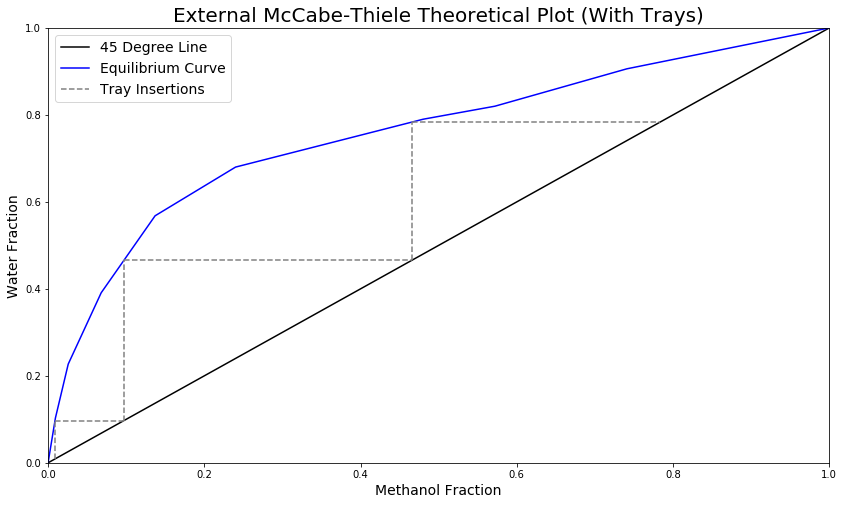

Theoretical Trays Necessary: 3
Estimated Column Efficiency: 0.42857


In [14]:
total_number_trays = 7.0

plt.figure(figsize=(14,8))

#45 Degree Line Plotting
plt.plot(np.linspace(0,1),np.linspace(0,1),c='black',label='45 Degree Line')
plt.axis([0,1,0,1])



#Equilibrium Curve Plotting
plt.plot(equilibrium_curve_MeOH_fraction, equilibrium_curve_water_fraction,\
         c='blue',label='Equilibrium Curve')


#Iterative Tray Insertion Algorithm
top_45_intercept_x = (top_operating_line_intercept)/(1-top_operating_line_slope)
starting_point = [top_45_intercept_x,top_45_intercept_x]
plt.axhline(y = starting_point[1], xmin = starting_point[0], xmax = starting_point[0],\
            c='gray',linestyle='dashed',label='Tray Insertions')

tray_count = 0
while starting_point[0] > bottoms_MeOH:
    left_pt = np.interp(starting_point[1], equilibrium_curve_water_fraction, equilibrium_curve_MeOH_fraction)
    plt.axhline(y = starting_point[1], xmin = left_pt, xmax = starting_point[0],c='gray',linestyle='dashed')
    bottom_pt = np.interp(left_pt, [0, 1],[0,1])
    plt.axvline(x = left_pt, ymin = bottom_pt, ymax = starting_point[1],c='gray',linestyle='dashed')
    tray_count+=1
    starting_point = [left_pt, bottom_pt]


plt.title('External McCabe-Thiele Theoretical Plot (With Trays)',fontsize=20)
plt.legend(fontsize=14)
plt.xlabel('Methanol Fraction',fontsize=14)
plt.ylabel('Water Fraction',fontsize=14)
plt.show()

print('Theoretical Trays Necessary: '+str(tray_count))
print('Estimated Column Efficiency: ' +str(round(tray_count/total_number_trays,5)))

## Generation of McCabe-Thiele Plot Based on Feed Pre-Sets

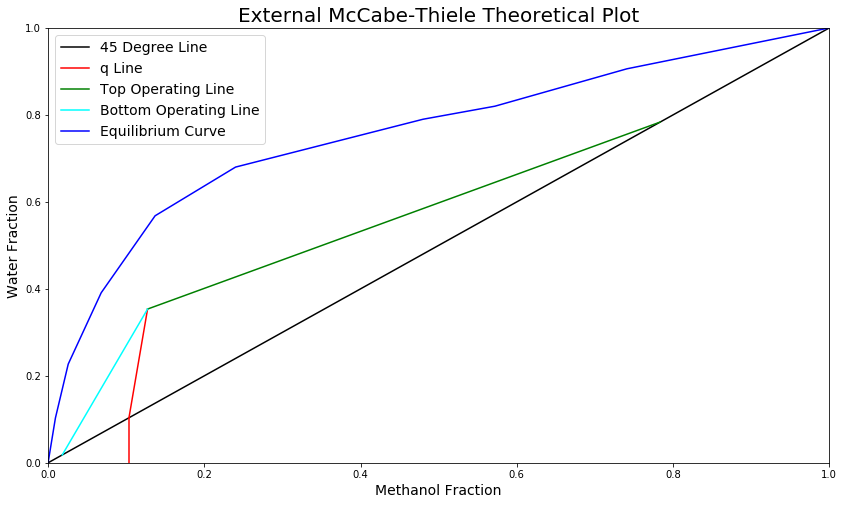

The equation of the upper operating line is y=0.65533+0.27006
The equation of the bottom operating line is y=3.07109-0.03761


In [15]:
plt.figure(figsize=(14,8))

#45 Degree Line Plotting
plt.plot(np.linspace(0,1),np.linspace(0,1),c='black',label='45 Degree Line')
plt.axis([0,1,0,1])


#Q Line Plotting
#This point is the intercept of the Q Line with the 45 Degree Line (x-coordinate).
q_45_intercept_x = (q_line_intercept)/(1-q_line_slope)
#This point is the intercept of the Q line with the Top Operating Line (x-coordinate).
q_top_intercept_x = -(top_operating_line_intercept-q_line_intercept)/\
                        (top_operating_line_slope-q_line_slope)

plt.plot([q_45_intercept_x,q_top_intercept_x],\
         [q_line_slope*q_45_intercept_x+q_line_intercept,
         q_line_slope*q_top_intercept_x+q_line_intercept],\
        c='red',label = 'q Line')

plt.axvline(x = q_45_intercept_x, ymin = 0, ymax = q_45_intercept_x,c='red')

#Top Operating Line
top_45_intercept_x = (top_operating_line_intercept)/(1-top_operating_line_slope)
plt.plot([q_top_intercept_x, top_45_intercept_x],\
         [top_operating_line_slope*q_top_intercept_x+top_operating_line_intercept,\
         top_operating_line_slope*top_45_intercept_x+top_operating_line_intercept],\
         c='green',label = 'Top Operating Line')


#Bottom Operating Line Plotting

plt.plot([bottoms_MeOH,q_top_intercept_x],[bottoms_MeOH,\
        top_operating_line_slope*q_top_intercept_x+top_operating_line_intercept],\
        c='cyan',label='Bottom Operating Line')

bottom_operating_line_slope = ((top_operating_line_slope*q_top_intercept_x+top_operating_line_intercept)-\
                               bottoms_MeOH)/(q_top_intercept_x-bottoms_MeOH)
bottom_operating_line_intercept = bottoms_MeOH - bottom_operating_line_slope*bottoms_MeOH

#Equilibrium Curve Plotting
plt.plot(equilibrium_curve_MeOH_fraction, equilibrium_curve_water_fraction,\
         c='blue',label='Equilibrium Curve')


plt.title('External McCabe-Thiele Theoretical Plot',fontsize=20)
plt.legend(fontsize=14)
plt.xlabel('Methanol Fraction',fontsize=14)
plt.ylabel('Water Fraction',fontsize=14)
plt.show()

print('The equation of the upper operating line is y='+str(round(top_operating_line_slope,5))+\
                                                   '+'+str(round(top_operating_line_intercept,5)))
print('The equation of the bottom operating line is y='+str(round(bottom_operating_line_slope,5))+\
                                                        str(round(bottom_operating_line_intercept,5)))

## Generation of McCabe-Thiele Plot Based on Feed Pre-Sets (Trays Included)

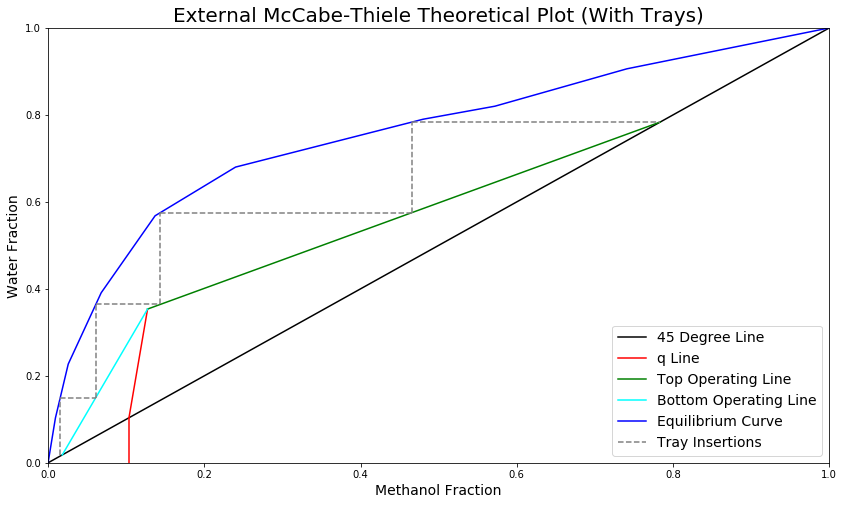

Theoretical Trays Necessary: 4
Estimated Column Efficiency: 0.57143


In [16]:
total_number_trays = 7.0

plt.figure(figsize=(14,8))

#45 Degree Line Plotting
plt.plot(np.linspace(0,1),np.linspace(0,1),c='black',label='45 Degree Line')
plt.axis([0,1,0,1])


#Q Line Plotting
#This point is the intercept of the Q Line with the 45 Degree Line (x-coordinate).
q_45_intercept_x = (q_line_intercept)/(1-q_line_slope)
#This point is the intercept of the Q line with the Top Operating Line (x-coordinate).
q_top_intercept_x = -(top_operating_line_intercept-q_line_intercept)/\
                        (top_operating_line_slope-q_line_slope)

plt.plot([q_45_intercept_x,q_top_intercept_x],\
         [q_line_slope*q_45_intercept_x+q_line_intercept,
         q_line_slope*q_top_intercept_x+q_line_intercept],\
        c='red',label = 'q Line')

plt.axvline(x = q_45_intercept_x, ymin = 0, ymax = q_45_intercept_x,c='red')

#Top Operating Line
top_45_intercept_x = (top_operating_line_intercept)/(1-top_operating_line_slope)
plt.plot([q_top_intercept_x, top_45_intercept_x],\
         [top_operating_line_slope*q_top_intercept_x+top_operating_line_intercept,\
         top_operating_line_slope*top_45_intercept_x+top_operating_line_intercept],\
         c='green',label = 'Top Operating Line')


#Bottom Operating Line Plotting

plt.plot([bottoms_MeOH,q_top_intercept_x],[bottoms_MeOH,\
        top_operating_line_slope*q_top_intercept_x+top_operating_line_intercept],\
        c='cyan',label='Bottom Operating Line')

#Equilibrium Curve Plotting
plt.plot(equilibrium_curve_MeOH_fraction, equilibrium_curve_water_fraction,\
         c='blue',label='Equilibrium Curve')


#Iterative Tray Insertion Algorithm
starting_point = [top_45_intercept_x,top_45_intercept_x]
plt.axhline(y = starting_point[1], xmin = starting_point[0], xmax = starting_point[0],\
            c='gray',linestyle='dashed',label='Tray Insertions')

tray_count = 0
while starting_point[0] > bottoms_MeOH:
    left_pt = np.interp(starting_point[1], equilibrium_curve_water_fraction, equilibrium_curve_MeOH_fraction)
    plt.axhline(y = starting_point[1], xmin = left_pt, xmax = starting_point[0],c='gray',linestyle='dashed')
    if left_pt>q_top_intercept_x:
        bottom_pt = np.interp(left_pt, [q_top_intercept_x, top_45_intercept_x],\
             [top_operating_line_slope*q_top_intercept_x+top_operating_line_intercept,\
             top_operating_line_slope*top_45_intercept_x+top_operating_line_intercept])
        plt.axvline(x = left_pt, ymin = bottom_pt, ymax = starting_point[1],c='gray',linestyle='dashed')
    else:
        bottom_pt = np.interp(left_pt, [bottoms_MeOH,q_top_intercept_x],[bottoms_MeOH,\
            top_operating_line_slope*q_top_intercept_x+top_operating_line_intercept])
        plt.axvline(x = left_pt, ymin = bottom_pt, ymax = starting_point[1],c='gray',linestyle='dashed')
    tray_count+=1
    starting_point = [left_pt, bottom_pt]


plt.title('External McCabe-Thiele Theoretical Plot (With Trays)',fontsize=20)
plt.legend(fontsize=14)
plt.xlabel('Methanol Fraction',fontsize=14)
plt.ylabel('Water Fraction',fontsize=14)
plt.show()

print('Theoretical Trays Necessary: '+str(tray_count))
print('Estimated Column Efficiency: ' +str(round(tray_count/total_number_trays,5)))

## Determination of Reflux Subcooling Q Value

In [17]:
# T_b found according to:
#http://www.methanol.org/wp-content/uploads/2016/06/Boiling-and-Flash-Points.pdf

T_b = 67.0 #Celsius
T_r = (np.average(reflux_MeOH_temperature)-32.0)*(5.0/9.0) #Celsius
cp_feed = tops_MeOH*cp_MeOH + (1-tops_MeOH)*cp_water #kJ/mol*C
H_r = tops_MeOH*hvap_MeOH + (1-tops_MeOH)*hvap_water #kJ/mol

#Based on McCabe Equation 21.27:
q_subcooling = 1.0+((cp_feed*(T_b-T_f))/H_r)

#Based on McCabe Equation 21.21:
internal_reflux_ratio = external_reflux_ratio*(1+(cp_feed*(T_b-T_r))/H_r)

#Top Operating Line, Based on McCabe Equation 21.22
top_operating_line_slope = external_reflux_ratio/(external_reflux_ratio+1)
top_operating_line_intercept = tops_MeOH/(external_reflux_ratio+1)

#Q-Line, Based on McCabe Equation 21.23
q_line_slope = q_subcooling/(q_subcooling-1)
q_line_intercept = feed_MeOH/(1-q_subcooling)

print('The calculated q-value for the subcooling is: '+str(q_subcooling))
print('The external reflux ratio is derived as: '+str(external_reflux_ratio))
print('The internal reflux ratio is derived as: '+str(internal_reflux_ratio))
print('We deem these the best fits for our operating line conditions.')
print('The equation for the q-line in question is y='+str(round(q_line_slope,5))+\
                                                  'x'+str(round(q_line_intercept,5)))

The calculated q-value for the subcooling is: 1.07942819248
The external reflux ratio is derived as: 1.90131244803
The internal reflux ratio is derived as: 2.06559244649
We deem these the best fits for our operating line conditions.
The equation for the q-line in question is y=13.58999x-1.30341


## Generation of McCabe-Thiele Plot Based on Reflux Pre-Sets

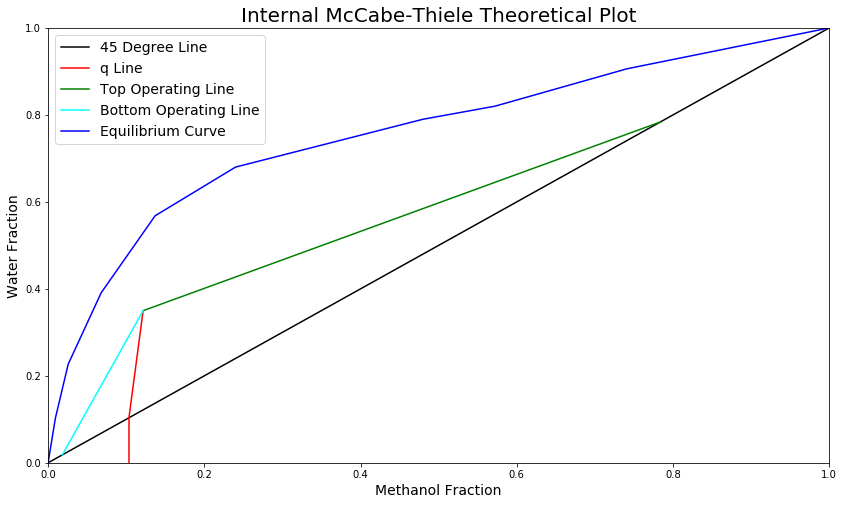

In [18]:
plt.figure(figsize=(14,8))

#45 Degree Line Plotting
plt.plot(np.linspace(0,1),np.linspace(0,1),c='black',label='45 Degree Line')
plt.axis([0,1,0,1])


#Q Line Plotting
#This point is the intercept of the Q Line with the 45 Degree Line (x-coordinate).
q_45_intercept_x = (q_line_intercept)/(1-q_line_slope)
#This point is the intercept of the Q line with the Top Operating Line (x-coordinate).
q_top_intercept_x = -(top_operating_line_intercept-q_line_intercept)/\
                        (top_operating_line_slope-q_line_slope)

plt.plot([q_45_intercept_x,q_top_intercept_x],\
         [q_line_slope*q_45_intercept_x+q_line_intercept,
         q_line_slope*q_top_intercept_x+q_line_intercept],\
        c='red',label = 'q Line')

plt.axvline(x = q_45_intercept_x, ymin = 0, ymax = q_45_intercept_x,c='red')

#Top Operating Line
top_45_intercept_x = (top_operating_line_intercept)/(1-top_operating_line_slope)
plt.plot([q_top_intercept_x, top_45_intercept_x],\
         [top_operating_line_slope*q_top_intercept_x+top_operating_line_intercept,\
         top_operating_line_slope*top_45_intercept_x+top_operating_line_intercept],\
         c='green',label = 'Top Operating Line')


#Bottom Operating Line Plotting

plt.plot([bottoms_MeOH,q_top_intercept_x],[bottoms_MeOH,\
        top_operating_line_slope*q_top_intercept_x+top_operating_line_intercept],\
        c='cyan',label='Bottom Operating Line')

#Equilibrium Curve Plotting
plt.plot(equilibrium_curve_MeOH_fraction, equilibrium_curve_water_fraction,\
         c='blue',label='Equilibrium Curve')


plt.title('Internal McCabe-Thiele Theoretical Plot',fontsize=20)
plt.legend(fontsize=14)
plt.xlabel('Methanol Fraction',fontsize=14)
plt.ylabel('Water Fraction',fontsize=14)
plt.show()


## Generation of McCabe-Thiele Plot Based on Reflux Pre-Sets (Trays Included)

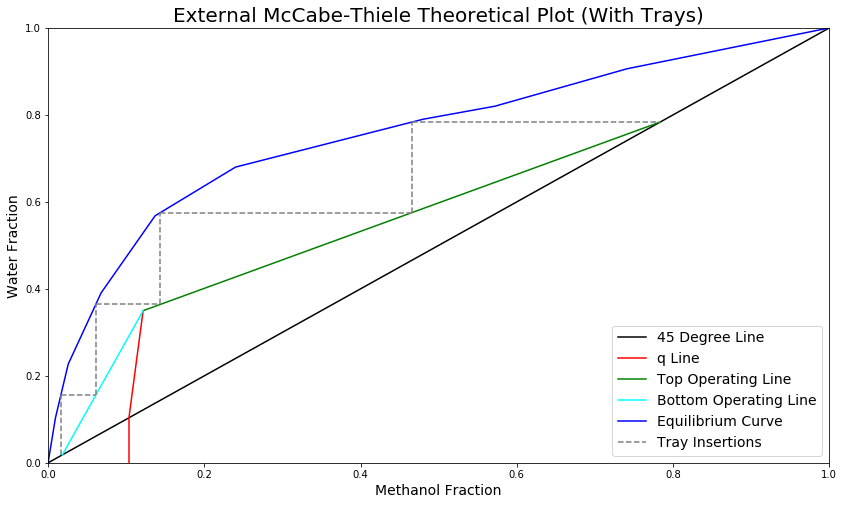

Theoretical Trays Necessary: 4
Estimated Column Efficiency: 0.57143


In [19]:
total_number_trays = 7.0

plt.figure(figsize=(14,8))

#45 Degree Line Plotting
plt.plot(np.linspace(0,1),np.linspace(0,1),c='black',label='45 Degree Line')
plt.axis([0,1,0,1])


#Q Line Plotting
#This point is the intercept of the Q Line with the 45 Degree Line (x-coordinate).
q_45_intercept_x = (q_line_intercept)/(1-q_line_slope)
#This point is the intercept of the Q line with the Top Operating Line (x-coordinate).
q_top_intercept_x = -(top_operating_line_intercept-q_line_intercept)/\
                        (top_operating_line_slope-q_line_slope)

plt.plot([q_45_intercept_x,q_top_intercept_x],\
         [q_line_slope*q_45_intercept_x+q_line_intercept,
         q_line_slope*q_top_intercept_x+q_line_intercept],\
        c='red',label = 'q Line')

plt.axvline(x = q_45_intercept_x, ymin = 0, ymax = q_45_intercept_x,c='red')

#Top Operating Line
top_45_intercept_x = (top_operating_line_intercept)/(1-top_operating_line_slope)
plt.plot([q_top_intercept_x, top_45_intercept_x],\
         [top_operating_line_slope*q_top_intercept_x+top_operating_line_intercept,\
         top_operating_line_slope*top_45_intercept_x+top_operating_line_intercept],\
         c='green',label = 'Top Operating Line')


#Bottom Operating Line Plotting

plt.plot([bottoms_MeOH,q_top_intercept_x],[bottoms_MeOH,\
        top_operating_line_slope*q_top_intercept_x+top_operating_line_intercept],\
        c='cyan',label='Bottom Operating Line')

#Equilibrium Curve Plotting
plt.plot(equilibrium_curve_MeOH_fraction, equilibrium_curve_water_fraction,\
         c='blue',label='Equilibrium Curve')


#Iterative Tray Insertion Algorithm
starting_point = [top_45_intercept_x,top_45_intercept_x]
plt.axhline(y = starting_point[1], xmin = starting_point[0], xmax = starting_point[0],\
            c='gray',linestyle='dashed',label='Tray Insertions')

tray_count = 0
while starting_point[0] > bottoms_MeOH:
    left_pt = np.interp(starting_point[1], equilibrium_curve_water_fraction, equilibrium_curve_MeOH_fraction)
    plt.axhline(y = starting_point[1], xmin = left_pt, xmax = starting_point[0],c='gray',linestyle='dashed')
    if left_pt>q_top_intercept_x:
        bottom_pt = np.interp(left_pt, [q_top_intercept_x, top_45_intercept_x],\
             [top_operating_line_slope*q_top_intercept_x+top_operating_line_intercept,\
             top_operating_line_slope*top_45_intercept_x+top_operating_line_intercept])
        plt.axvline(x = left_pt, ymin = bottom_pt, ymax = starting_point[1],c='gray',linestyle='dashed')
    else:
        bottom_pt = np.interp(left_pt, [bottoms_MeOH,q_top_intercept_x],[bottoms_MeOH,\
            top_operating_line_slope*q_top_intercept_x+top_operating_line_intercept])
        plt.axvline(x = left_pt, ymin = bottom_pt, ymax = starting_point[1],c='gray',linestyle='dashed')
    tray_count+=1
    starting_point = [left_pt, bottom_pt]


plt.title('External McCabe-Thiele Theoretical Plot (With Trays)',fontsize=20)
plt.legend(fontsize=14)
plt.xlabel('Methanol Fraction',fontsize=14)
plt.ylabel('Water Fraction',fontsize=14)
plt.show()

print('Theoretical Trays Necessary: '+str(tray_count))
print('Estimated Column Efficiency: ' +str(round(tray_count/total_number_trays,5)))

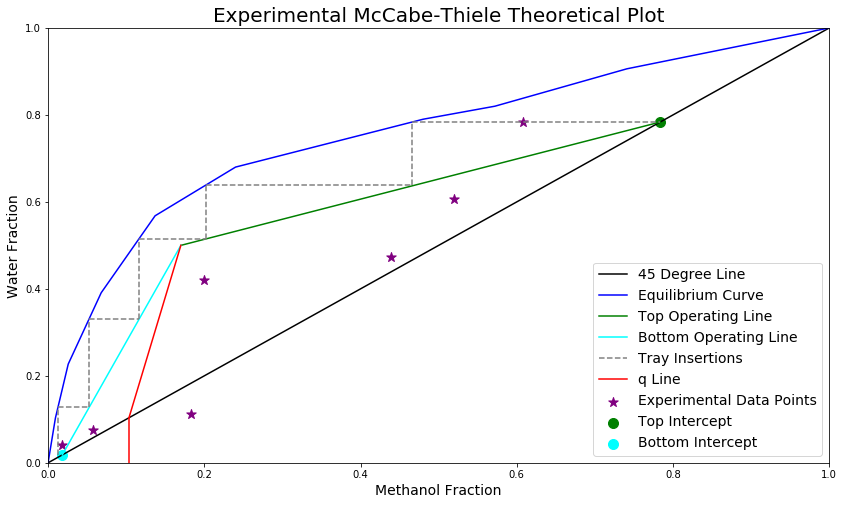

The equation of the upper operating line is y=0.4676+0.4205
The equation of the bottom operating line is y=3.1437-0.0344


In [20]:
#tray_data_vap_MeOH
#tray_data_liq_MeOH
plt.figure(figsize=(14,8))

#45 Degree Line Plotting
plt.plot(np.linspace(0,1),np.linspace(0,1),c='black',label='45 Degree Line')
plt.axis([0,1,0,1])

#Equilibrium Curve Plotting
plt.plot(equilibrium_curve_MeOH_fraction, equilibrium_curve_water_fraction,\
         c='blue',label='Equilibrium Curve')

#Experimental Data Plotting

plt.scatter(tray_data_vap_MeOH+[bottoms_MeOH],[tops_MeOH]+tray_data_liq_MeOH,\
            label='Experimental Data Points',marker='*',s=100,c='purple')

#Top and Bottom Operating Line Plotting
plt.scatter([top_45_intercept_x],[top_45_intercept_x], marker = 'o',\
            s = 100, c='green',label = 'Top Intercept')
plt.scatter([bottoms_MeOH],[bottoms_MeOH],marker='o',\
            s = 100, c = 'cyan', label = 'Bottom Intercept')

top_operating_line_slope = 0.4676
top_operating_line_intercept = 0.4205
bottom_operating_line_slope = 3.1437
bottom_operating_line_intercept = -0.0344

top_bottom_intersect_x = -(bottom_operating_line_intercept - top_operating_line_intercept)/\
                         (bottom_operating_line_slope - top_operating_line_slope)
top_bottom_intersect_y = top_operating_line_slope*top_bottom_intersect_x + top_operating_line_intercept

plt.plot([top_bottom_intersect_x,top_45_intercept_x],[top_bottom_intersect_y, top_45_intercept_x],\
         c='green',label='Top Operating Line')

plt.plot([bottoms_MeOH,top_bottom_intersect_x],[bottoms_MeOH,top_bottom_intersect_y],\
         c='cyan',label='Bottom Operating Line')



#Iterative Tray Insertion Algorithm
starting_point = [top_45_intercept_x,top_45_intercept_x]
plt.axhline(y = starting_point[1], xmin = starting_point[0], xmax = starting_point[0],\
            c='gray',linestyle='dashed',label='Tray Insertions')

#Q Line Plotting
#This point is the intercept of the Q Line with the 45 Degree Line (x-coordinate).
q_45_intercept_x = (q_line_intercept)/(1-q_line_slope)
#This point is the intercept of the Q line with the Top Operating Line (x-coordinate).
q_top_intercept_x = -(top_operating_line_intercept-q_line_intercept)/\
                        (top_operating_line_slope-q_line_slope)

plt.plot([q_45_intercept_x,top_bottom_intersect_x],\
         [q_45_intercept_x,top_bottom_intersect_y],\
        c='red',label = 'q Line')

plt.axvline(x = q_45_intercept_x, ymin = 0, ymax = q_45_intercept_x,c='red')



tray_count = 0
while starting_point[0] > bottoms_MeOH:
    left_pt = np.interp(starting_point[1], equilibrium_curve_water_fraction, equilibrium_curve_MeOH_fraction)
    plt.axhline(y = starting_point[1], xmin = left_pt, xmax = starting_point[0],c='gray',linestyle='dashed')
    if left_pt>q_top_intercept_x:
        bottom_pt = np.interp(left_pt, [q_top_intercept_x, top_45_intercept_x],\
             [top_operating_line_slope*q_top_intercept_x+top_operating_line_intercept,\
             top_operating_line_slope*top_45_intercept_x+top_operating_line_intercept])
        plt.axvline(x = left_pt, ymin = bottom_pt, ymax = starting_point[1],c='gray',linestyle='dashed')
    else:
        bottom_pt = np.interp(left_pt, [bottoms_MeOH,q_top_intercept_x],[bottoms_MeOH,\
            bottom_operating_line_slope*q_top_intercept_x+bottom_operating_line_intercept])
        plt.axvline(x = left_pt, ymin = bottom_pt, ymax = starting_point[1],c='gray',linestyle='dashed')
    tray_count+=1
    starting_point = [left_pt, bottom_pt]


plt.title('Experimental McCabe-Thiele Theoretical Plot',fontsize=20)
plt.legend(fontsize=14)
plt.xlabel('Methanol Fraction',fontsize=14)
plt.ylabel('Water Fraction',fontsize=14)
plt.show()

print('The equation of the upper operating line is y='+str(round(top_operating_line_slope,5))+\
                                                   '+'+str(round(top_operating_line_intercept,5)))
print('The equation of the bottom operating line is y='+str(round(bottom_operating_line_slope,5))+\
                                                        str(round(bottom_operating_line_intercept,5)))

## Murphree Tray Efficiency Calculations

In [21]:
full_tray_data_vap_MeOH = tray_data_vap_MeOH+[bottoms_MeOH]
full_tray_data_liq_MeOH = [tops_MeOH]+tray_data_liq_MeOH


for i in range(0,len(full_tray_data_vap_MeOH)-1):
    yn_star = np.interp(full_tray_data_vap_MeOH[i],equilibrium_curve_MeOH_fraction,\
                                                   equilibrium_curve_water_fraction)
    tray_efficiency = (full_tray_data_liq_MeOH[i]-full_tray_data_liq_MeOH[i+1])/\
                      (yn_star - full_tray_data_liq_MeOH[i+1])*100
    print("The Murphree Tray Efficiency of tray "+str(i+1)+' is '+str(round(tray_efficiency,3))+'%.')
print('The Murphree Tray Efficiency of tray 7 is 100%')

The Murphree Tray Efficiency of tray 1 is 76.327%.
The Murphree Tray Efficiency of tray 2 is 40.274%.
The Murphree Tray Efficiency of tray 3 is 15.517%.
The Murphree Tray Efficiency of tray 4 is 58.666%.
The Murphree Tray Efficiency of tray 5 is 6.75%.
The Murphree Tray Efficiency of tray 6 is 11.359%.
The Murphree Tray Efficiency of tray 7 is 100%
